In [1]:
import kagglehub
import os
import pandas as pd

# Download the dataset
path = kagglehub.dataset_download("larsen0966/penguins")

# Check what files are in the folder
print("Path:", path)
print("Files:", os.listdir(path))

c:\Users\NAWAFsPC\Documents\Sdaia_week3\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 3.78k/3.78k [00:00<?, ?B/s]

Extracting files...
Path: C:\Users\NAWAFsPC\.cache\kagglehub\datasets\larsen0966\penguins\versions\1
Files: ['penguins.csv']


In [4]:
csv_path = os.path.join(path, "penguins.csv")

df = pd.read_csv(csv_path)


In [5]:
df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [6]:
df.isnull().sum()

Unnamed: 0            0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [ ]:
# since missing values are low we're gonna drop them
df = df.dropna()

# 2. Check again to be sure
print(df.isnull().sum())

Unnamed: 0           0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64


In [12]:
df_encoded = pd.get_dummies(df)

In [15]:
df_encoded.head()

,Unnamed: 0,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,1,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,2,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,3,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
4,5,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False
5,6,39.3,20.6,190.0,3650.0,2007,True,False,False,False,False,True,False,True


In [17]:
y = df['species']

X = df_encoded.drop(['species_Adelie','species_Chinstrap','species_Gentoo'], axis= 1)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.shape

(266, 11)

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, 232 to 108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         266 non-null    int64  
 1   bill_length_mm     266 non-null    float64
 2   bill_depth_mm      266 non-null    float64
 3   flipper_length_mm  266 non-null    float64
 4   body_mass_g        266 non-null    float64
 5   year               266 non-null    int64  
 6   island_Biscoe      266 non-null    bool   
 7   island_Dream       266 non-null    bool   
 8   island_Torgersen   266 non-null    bool   
 9   sex_female         266 non-null    bool   
 10  sex_male           266 non-null    bool   
dtypes: bool(5), float64(4), int64(2)
memory usage: 15.8 KB


In [21]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()

model.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [22]:
y_pred = model.predict(X_test)


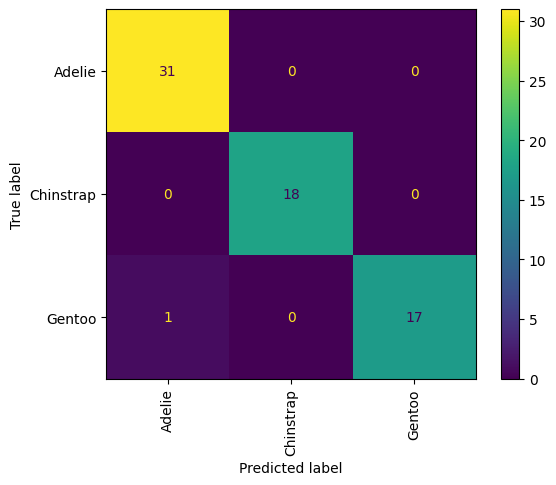

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation='vertical')
plt.show()

In [24]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {score:.2%}")

Model Accuracy: 98.51%


In [25]:
import joblib

joblib.dump(model, 'penguin_model.pkl')

['penguin_model.pkl']